In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv(r'C:\Users\HP\Downloads\Mall_Customers.csv')

Now that I have imported the data, I am going to take a cursory look at it and see how it is organized, what are the data types and data distribution in columns, and also how many missing or invalid values do we have.

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.shape

(200, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No null values. Great! This will save us some time in data cleaning.

In [47]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The customer ID column does not provide us with any meaningful information. So I will remove it right away.

In [48]:
df.drop(['CustomerID'],axis=1,inplace=True)

Now let's do some analysis and visualization of the data.

In [49]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

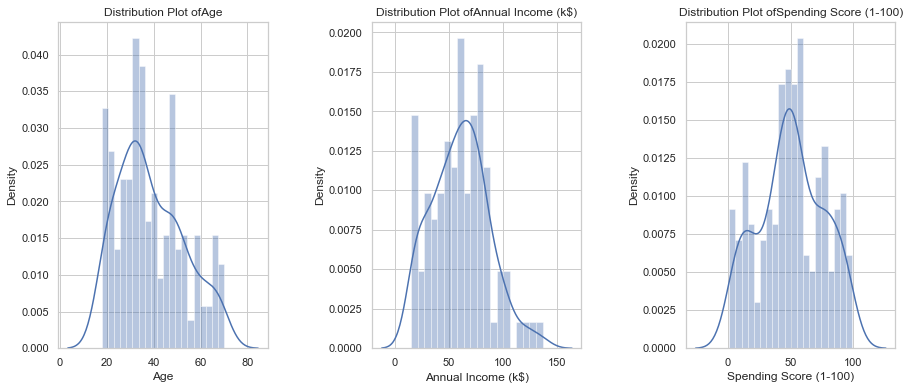

In [50]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title('Distribution Plot of{}'.format(x))
plt.show()

We can see that most customers are between 20 and 50 years old. Also, most of the income data lies somewhere between 40,000 and 80,000 USD/year. The spending score distribution also peaks around 40 to 50.

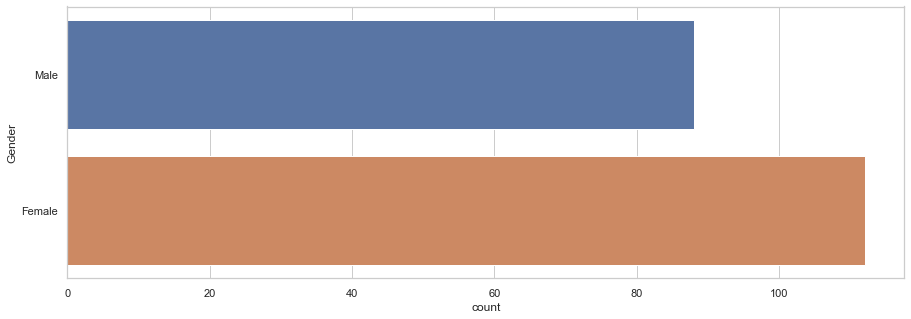

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

As we can see, most of the customers are females. This can also give us an idea of how should we target our advertisements.

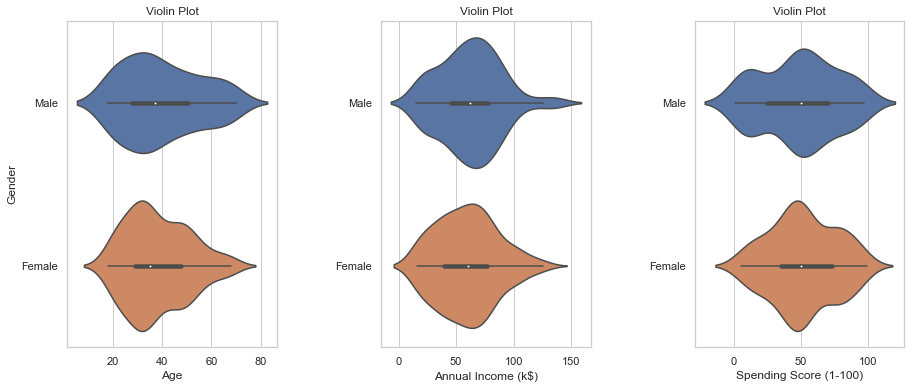

In [52]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()


Now let us divide the age to different ranges for a more detailed analysis.

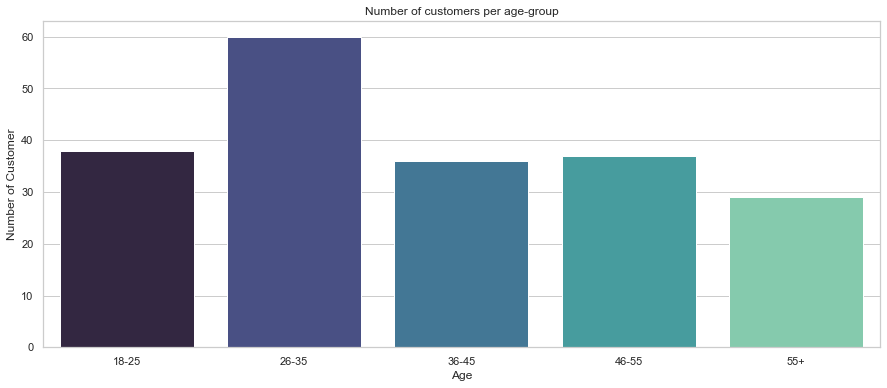

In [53]:
age_18_25=df.Age[(df.Age>=18)&(df.Age<=25)]
age_26_35=df.Age[(df.Age>=26)&(df.Age<=35)]
age_36_45=df.Age[(df.Age>=36)&(df.Age<=45)]
age_46_55=df.Age[(df.Age>=46)&(df.Age<=55)]
age_above55=df.Age[(df.Age>=56)]

agex=['18-25','26-35','36-45','46-55','55+']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above55.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.title('Number of customers per age-group')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()


We can see that the highest number of customers are between ages 26 and 35. this another advertisement tip.

Now, let's go ahead and try to understand the relation between annual income and the spending score.

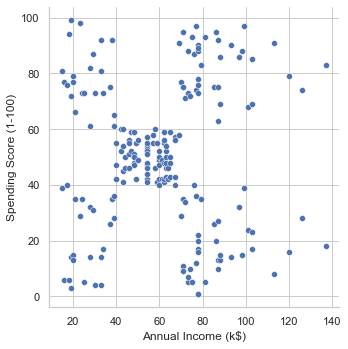

In [54]:
sns.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

So, we can see that the relation between the annual income and spending score is not clearly visible for incomes between 20k-40k USD/year and above 70k USD/year. But for those who earn between 40k to 70k USD/year, it is visually understandable that the spending score lies in a particular period. So, it is quite typical for a person who earns between 40k to 70k USD/year to have an spending score between 40 to 60.

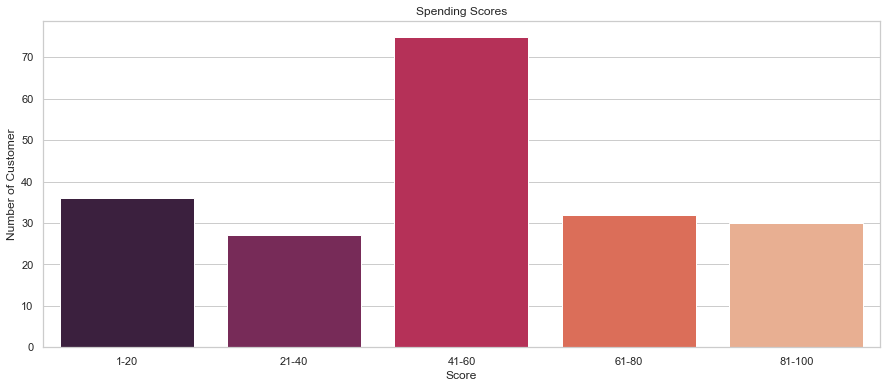

In [55]:
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1)&(df['Spending Score (1-100)']<=20)]
ss_21_40=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21)&(df['Spending Score (1-100)']<=40)]
ss_41_60=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41)&(df['Spending Score (1-100)']<=60)]
ss_61_80=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61)&(df['Spending Score (1-100)']<=80)]
ss_81_100=df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81)]

ssx=['1-20','21-40','41-60','61-80','81-100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Customer')
plt.show()

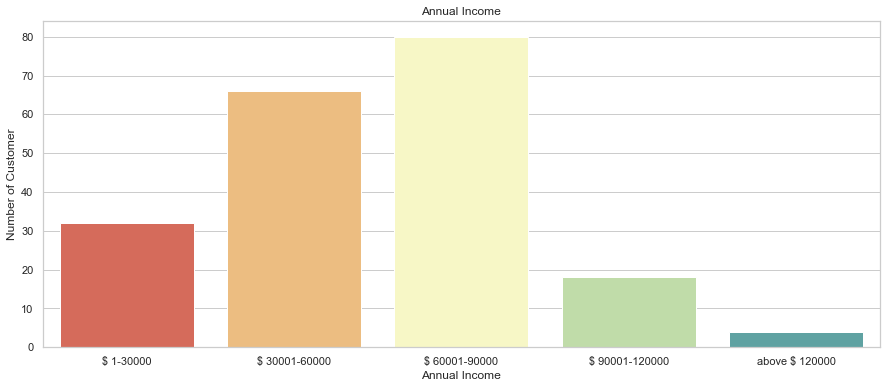

In [56]:
df['Annual Income (k$)']=df['Annual Income (k$)']*1000
ai_0_30=df['Annual Income (k$)'][(df['Annual Income (k$)']>=1)&(df['Annual Income (k$)']<=30000)]
ai_31_60=df['Annual Income (k$)'][(df['Annual Income (k$)']>=30001)&(df['Annual Income (k$)']<=60000)]
ai_61_90=df['Annual Income (k$)'][(df['Annual Income (k$)']>=60001)&(df['Annual Income (k$)']<=90000)]
ai_91_120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=90001)&(df['Annual Income (k$)']<=120000)]
ai_above120=df['Annual Income (k$)'][(df['Annual Income (k$)']>=120001)]

aix=['$ 1-30000','$ 30001-60000','$ 60001-90000','$ 90001-120000','above $ 120000']
aiy=[len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_above120.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.title('Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customer')
plt.show()

Now that we have analyzed and visualized our data and have an idea of how our customers stand in terms of age, income and spending score, let's start the fun part and build up a machine learning model for our clustering purposes.

Initially, let's cluster the data according to age and spending score. Here, I will use K-Means clustering algorithm.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


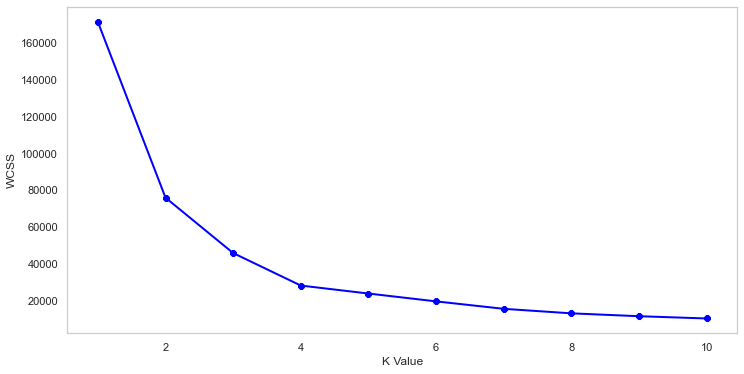

In [61]:
X1=df.loc[:,['Age','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]

#let's first find the optimum number of clusters (Here, I will search for it between 1 to 11):

for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()
    



So, using the elbow method to select the optimum k value, I will choose 4. One may choose 5 as well, but I think 4 is optimal enough here and the shape of the plot after 4 is quite flat.

In [63]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


we can see that our data is devided into 4 clusters (0, 1, 2 and 3).

Let's check the coordinates of centroids now.

In [64]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


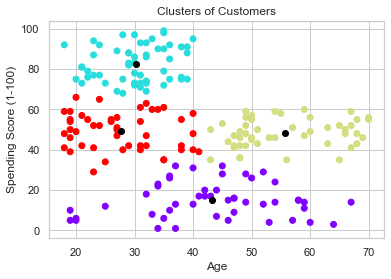

In [86]:
plt.scatter(X1[:,0],X1[:,1],c=label,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Now, let's do the same for annual incom and spending score.

#But let's first normalize the data in the annual income column as it has a much bigger scale compared to others and might affect the results in an un-desired way.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


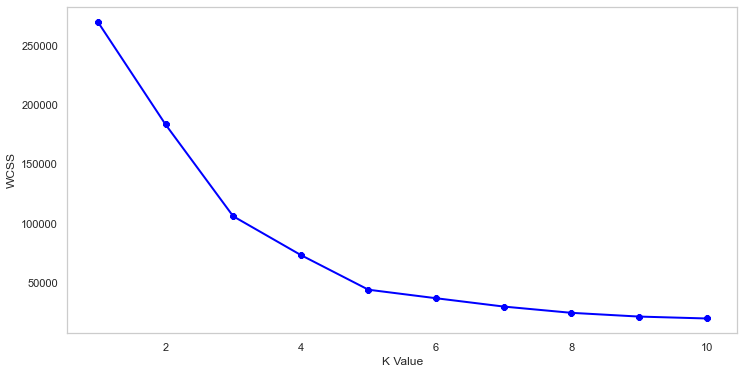

In [94]:

df['Annual Income (k$)']=df['Annual Income (k$)']/1000
X2=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]

#let's first find the optimum number of clusters (Here, I will search for it between 1 to 11):

for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()
    

This time, it appears that 5 is a better choice for number of clusters as the plot becomes pretty flat and constant after that.

In [95]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [96]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


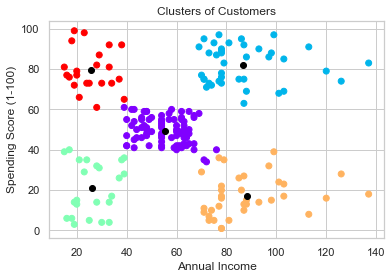

In [97]:
plt.scatter(X2[:,0],X2[:,1],c=label,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

It seems that the K-Means clustering algorithm already has a good performance in recognizing 5 different customer segments. 
1. The high-spending low income customers
2. The low-spending low income customers
3. The average-earners who almost always spend around the average!
4. The high-spending high income group
5. The low-spending high earners (probably the wealthy-frugal group!)

Now, let's go for a 3D plot and consider all three together.

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


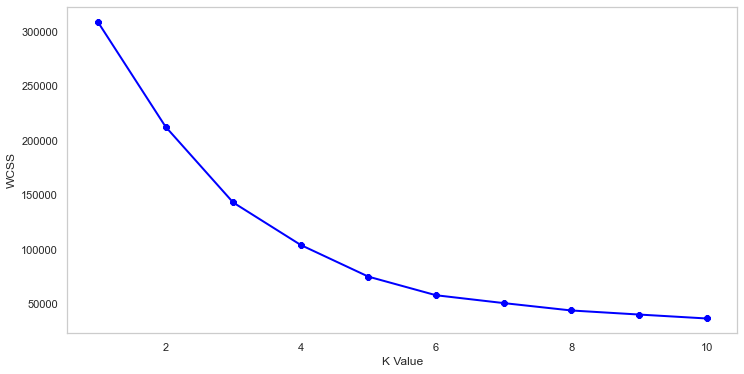

In [98]:
X3=df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss=[]

#let's first find the optimum number of clusters (Here, I will search for it between 1 to 11):

for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()
    

Here, after 6, the graph seems pretty constant. So, let's select 6.

In [107]:
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(X3)
print(label)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 1 4 1 3 2 4 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 5 3 5 0 5 0 5 0 5 3 5 0 5 0 5 0 5 0 5 3 5 0 5 0 5
 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0
 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5]


In [108]:
print(kmeans.cluster_centers_)

[[41.68571429 88.22857143 17.28571429]
 [56.15555556 53.37777778 49.08888889]
 [44.14285714 25.14285714 19.52380952]
 [27.         56.65789474 49.13157895]
 [25.27272727 25.72727273 79.36363636]
 [32.69230769 86.53846154 82.12820513]]


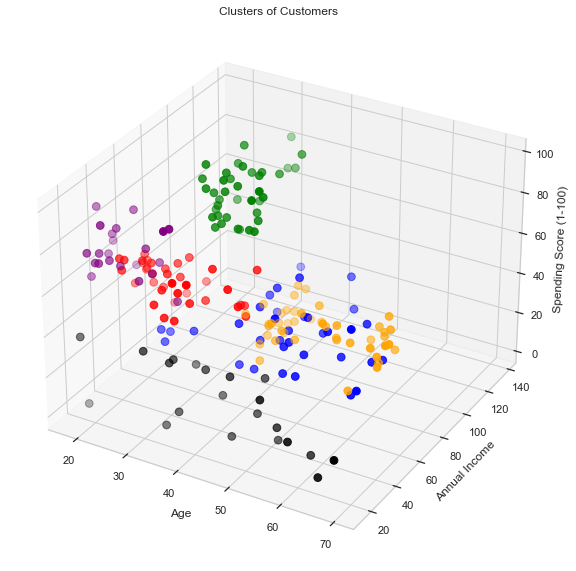

In [121]:
from mpl_toolkits.mplot3d import Axes3D
clusters=kmeans.fit_predict(X3)
df['label']=clusters

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df['Age'][df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c='blue',s=60)
ax.scatter(df['Age'][df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c='red',s=60)
ax.scatter(df['Age'][df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c='green',s=60)
ax.scatter(df['Age'][df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c='orange',s=60)
ax.scatter(df['Age'][df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c='purple',s=60)
ax.scatter(df['Age'][df.label==5],df['Annual Income (k$)'][df.label==5],df['Spending Score (1-100)'][df.label==5],c='black',s=60)

#ax.view_init(50,185)

plt.title('Clusters of Customers')

plt.xlabel('Age')
plt.ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

So, here are the 6 customer segments that we have based on the three clustering factors. In order to interpret them well, I should rotate the 3D plot and analyze it from different aspects. I will do this in future commits of the notebook.